In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def is_safe_general(board, row, col, n):
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

In [3]:
def solve_n_queens_general_util(board, col, n):
    # Base case: If all queens are placed
    if col >= n:
        return True

    # Consider this column and try placing this queen in all rows one by one
    for i in range(n):
        if is_safe_general(board, i, col, n):
            # Place this queen in board[i][col]
            board[i][col] = 1

            # Recur to place rest of the queens
            if solve_n_queens_general_util(board, col + 1, n):
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then
            # Remove queen from board[i][col]
            board[i][col] = 0

    # If the queen cannot be placed in any row in this column col then return false
    return False

In [4]:

def solve_n_queens_general(n):
    board = [[0 for _ in range(n)] for _ in range(n)]

    if not solve_n_queens_general_util(board, 0, n):
        return "Solution does not exist"
    return board

Example usage for a general number of queens (let's say n=8)

In [9]:
n_queens_solution_general = solve_n_queens_general(8)
n_queens_solution_general

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0]]

In [10]:
sum([1 for i in n_queens_solution_general if 1 in i])

8

In [15]:
def plot_chessboard_n_queens(solution):
    n = len(solution)
    board = np.zeros((n, n))
    
    # Create the chessboard pattern
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1

    plt.figure(figsize=(6, 6))
    plt.imshow(board, cmap='gray', interpolation='nearest')
    plt.xticks([]), plt.yticks([])

    # Adding queens to the board
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 1:
                plt.text(j, i, '♛', fontsize=20, ha='center', va='center', color='blue')

    plt.title(f'{n}-Queens Solution on Chessboard')
    plt.show()

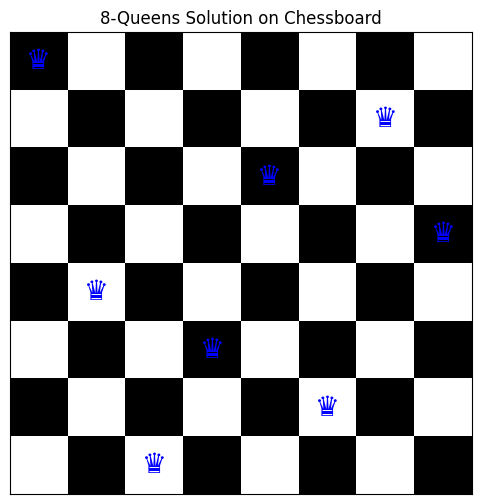

In [16]:
# Plotting the solution for n_queens_solution_general
plot_chessboard_n_queens(n_queens_solution_general)